<a href="https://www.kaggle.com/code/mdmahfuzsumon/holistic-treatment-approach-combining?scriptVersionId=298848841" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/holistic-and-integrative-health-outcomes-dataset/integrative_health_1000_patients.csv


# Holistic & Integrative Health Outcomes Analysis

### Integrating Physical, Mental, Lifestyle & Treatment Factors

This notebook explores how physical health, mental well-being, lifestyle habits, nutrition, and integrative treatments influence patient recovery outcomes.

## Objectives

✔ Explore health patterns  
✔ Identify healing factors  
✔ Build predictive models  
✔ Understand integrative treatment impact  
✔ Generate data-driven insights  

Author: Md Mahfuz Sumon


Import Libraries

In [2]:
# Core Data Libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Statistics
from scipy.stats import pearsonr

# Display settings
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (8,5)


Load Dataset

In [3]:
import os
os.listdir('/kaggle/input')


['holistic-and-integrative-health-outcomes-dataset']

In [4]:
df = pd.read_csv('/kaggle/input/holistic-and-integrative-health-outcomes-dataset/integrative_health_1000_patients.csv')

df.head()


,patient_id,age,gender,bmi,exercise_minutes,sleep_hours,chronic_disease,stress_level,anxiety_level,social_support,...,homeopathy_use,herbal_use,physiotherapy,turmeric_use,black_seed_use,tulsi_use,neem_use,health_score,health_outcome,disease_severity
0,1,56,Male,27.4,16,7.0,0,7,3,6,...,0,0,0,0,1,0,1,95.4,Recovered,Mild
1,2,69,Male,23.7,23,7.9,0,8,1,9,...,1,0,1,0,1,0,0,100.0,Recovered,Mild
2,3,46,Female,25.2,20,2.6,0,1,2,8,...,1,0,1,0,0,0,1,100.0,Recovered,Mild
3,4,32,Male,25.4,50,10.0,0,5,8,7,...,0,1,0,1,1,0,0,100.0,Recovered,Mild
4,5,60,Male,31.4,58,5.9,1,2,1,8,...,1,1,1,1,1,0,1,100.0,Recovered,Mild


Dataset Overview

In [5]:
print("Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
df.describe()

Shape: (1000, 28)

Missing Values:
 patient_id             0
age                    0
gender                 0
bmi                    0
exercise_minutes       0
sleep_hours            0
chronic_disease        0
stress_level           0
anxiety_level          0
social_support         0
smoking                0
alcohol                0
screen_time_hours      0
vegetable_intake       0
fruit_intake           0
water_intake           0
processed_food         0
allopathy_treatment    0
homeopathy_use         0
herbal_use             0
physiotherapy          0
turmeric_use           0
black_seed_use         0
tulsi_use              0
neem_use               0
health_score           0
health_outcome         0
disease_severity       0
dtype: int64


,patient_id,age,bmi,exercise_minutes,sleep_hours,chronic_disease,stress_level,anxiety_level,social_support,smoking,...,processed_food,allopathy_treatment,homeopathy_use,herbal_use,physiotherapy,turmeric_use,black_seed_use,tulsi_use,neem_use,health_score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,49.857000,26.020900,29.981000,7.027900,0.350000,4.928000,4.991000,4.946000,0.263000,...,5.08900,0.698000,0.404000,0.469000,0.30700,0.486000,0.50000,0.521000,0.511000,94.350900
std,288.819436,18.114267,4.122806,17.066631,1.536787,0.477208,2.540723,2.620264,2.699328,0.440483,...,2.56157,0.459355,0.490943,0.499288,0.46148,0.500054,0.50025,0.499809,0.500129,7.540003
min,1.000000,18.000000,12.400000,0.000000,2.100000,0.000000,1.000000,1.000000,1.000000,0.000000,...,1.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,53.100000
25%,250.750000,35.000000,23.400000,16.000000,6.000000,0.000000,3.000000,3.000000,3.000000,0.000000,...,3.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,89.800000
50%,500.500000,50.000000,25.900000,30.000000,7.100000,0.000000,5.000000,5.000000,5.000000,0.000000,...,5.00000,1.000000,0.000000,0.000000,0.00000,0.000000,0.50000,1.000000,1.000000,98.500000
75%,750.250000,66.000000,28.900000,44.000000,8.000000,1.000000,7.000000,7.000000,7.000000,1.000000,...,7.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,100.000000
max,1000.000000,79.000000,38.600000,59.000000,11.900000,1.000000,9.000000,9.000000,9.000000,1.000000,...,9.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,100.000000


Demographic Analysis

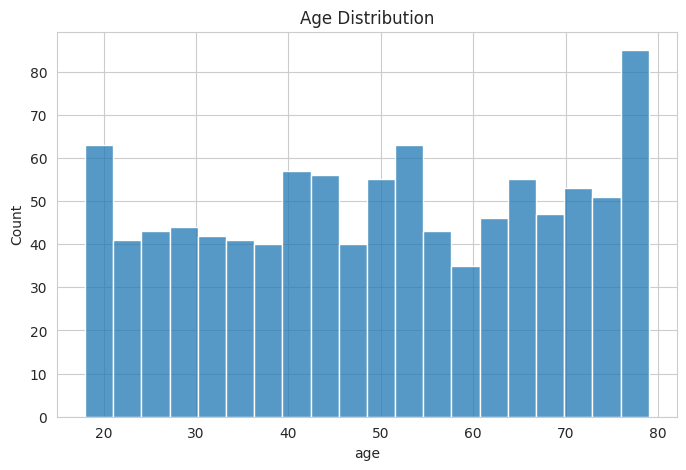

In [6]:
sns.histplot(df['age'], bins=20)
plt.title("Age Distribution")
plt.show()


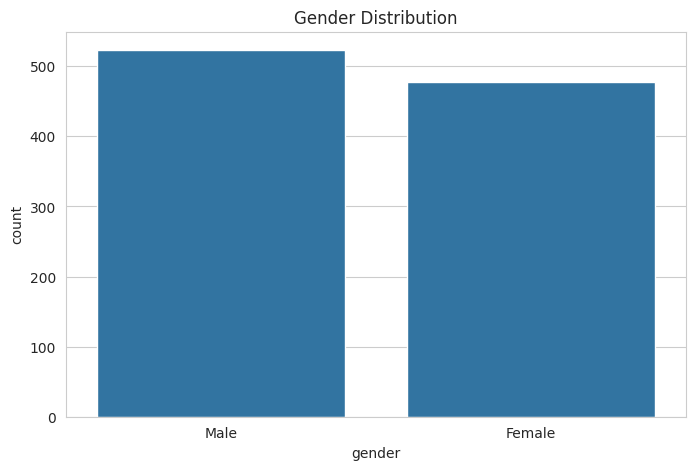

In [7]:
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()


Mental Health Insights

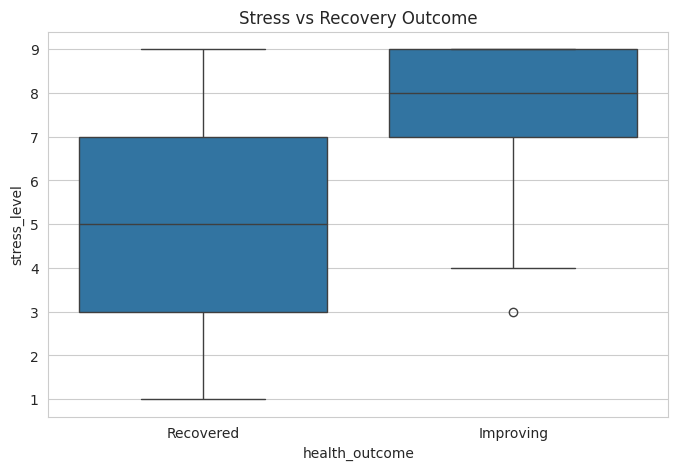

In [8]:
sns.boxplot(x='health_outcome', y='stress_level', data=df)
plt.title("Stress vs Recovery Outcome")
plt.show()

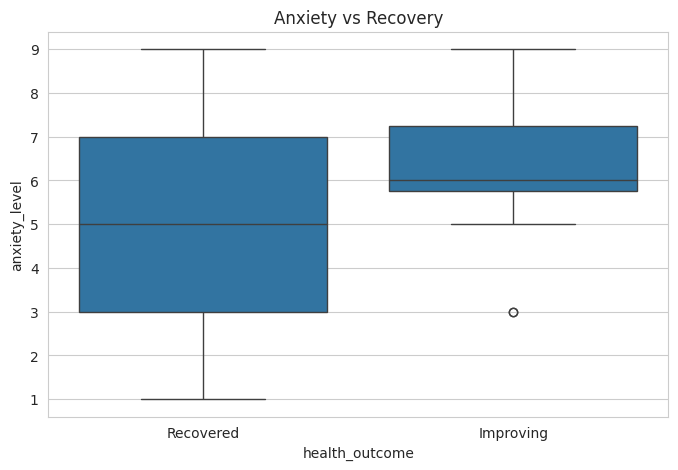

In [9]:
sns.boxplot(x='health_outcome', y='anxiety_level', data=df)
plt.title("Anxiety vs Recovery")
plt.show()

Lifestyle Impact Analysis

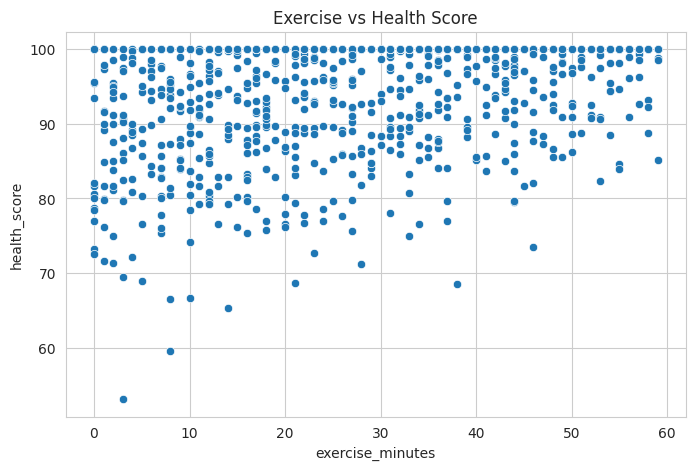

In [10]:
sns.scatterplot(x='exercise_minutes', y='health_score', data=df)
plt.title("Exercise vs Health Score")
plt.show()


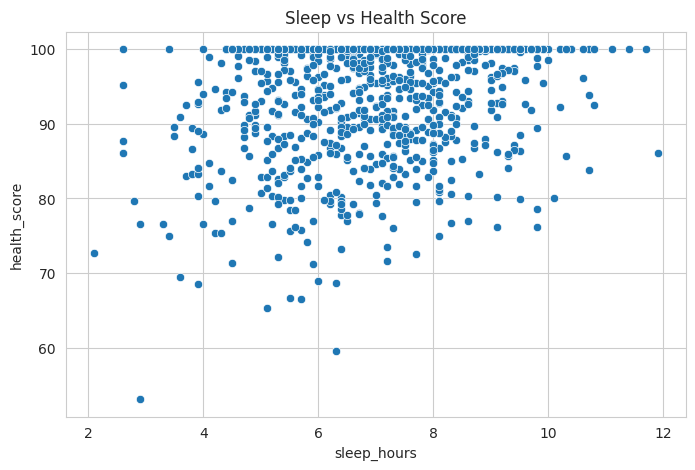

In [11]:
sns.scatterplot(x='sleep_hours', y='health_score', data=df)
plt.title("Sleep vs Health Score")
plt.show()


Nutrition & Healing

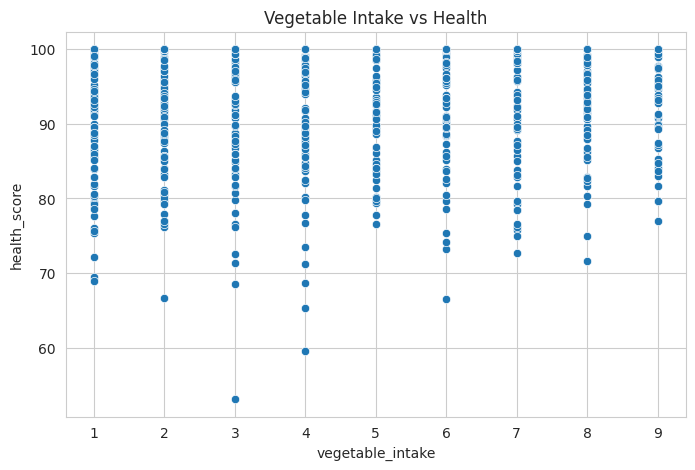

In [12]:
sns.scatterplot(x='vegetable_intake', y='health_score', data=df)
plt.title("Vegetable Intake vs Health")
plt.show()


Treatment Effectiveness

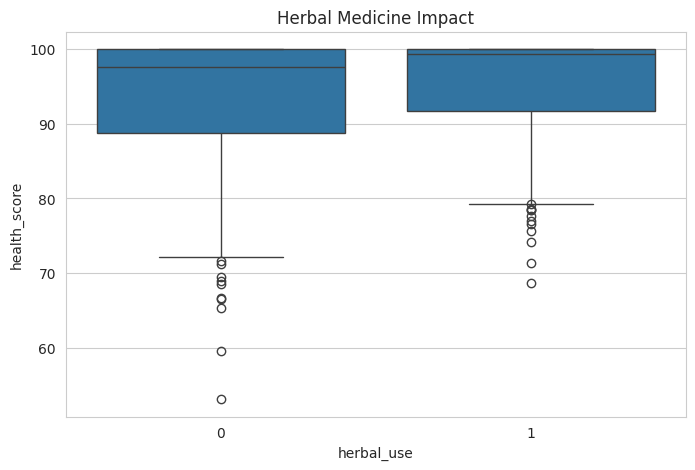

In [13]:
sns.boxplot(x='herbal_use', y='health_score', data=df)
plt.title("Herbal Medicine Impact")
plt.show()


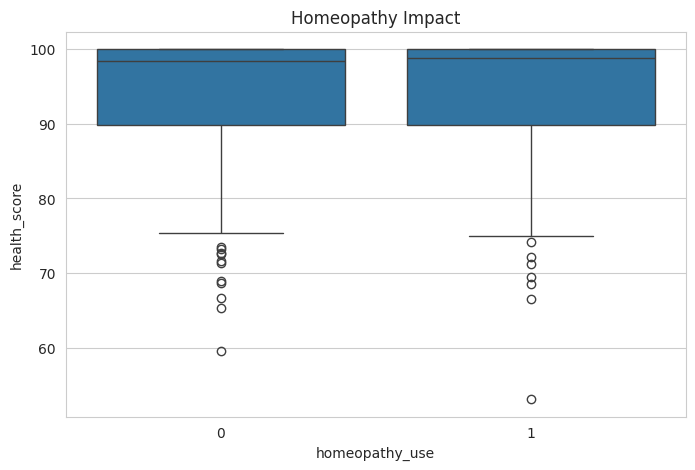

In [14]:
sns.boxplot(x='homeopathy_use', y='health_score', data=df)
plt.title("Homeopathy Impact")
plt.show()


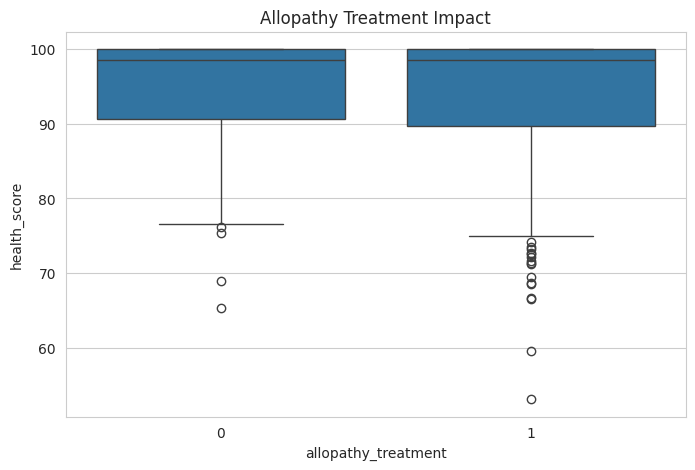

In [15]:
sns.boxplot(x='allopathy_treatment', y='health_score', data=df)
plt.title("Allopathy Treatment Impact")
plt.show()


Correlation Heatmap

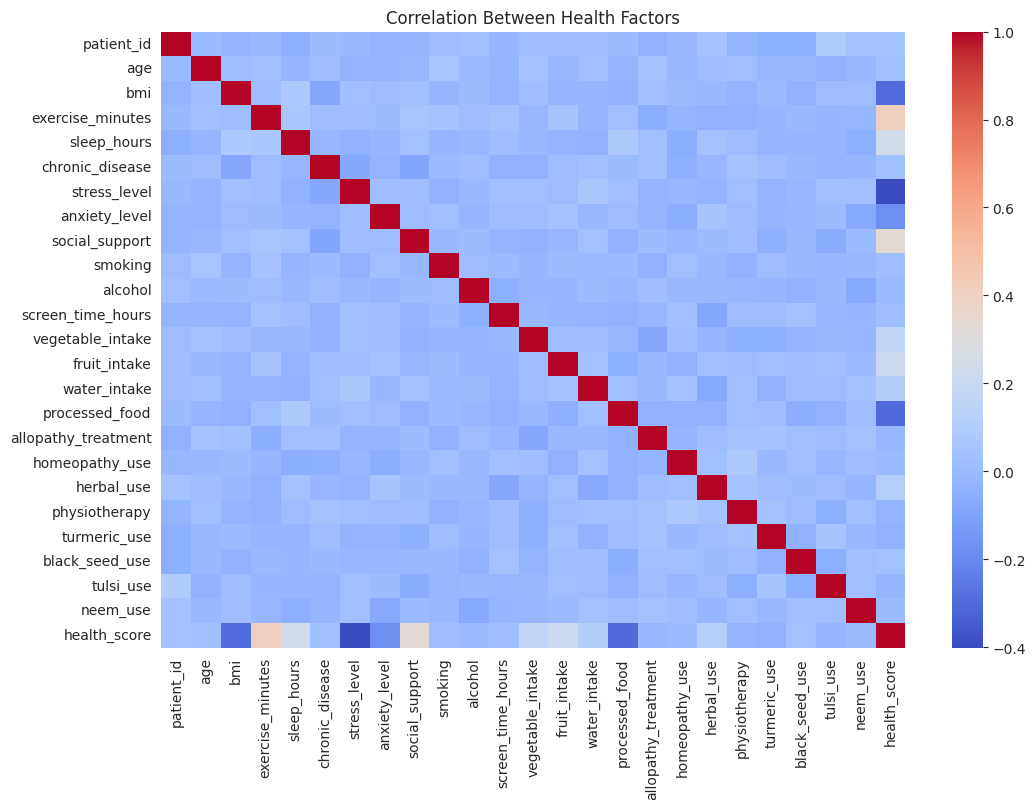

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')
plt.title("Correlation Between Health Factors")
plt.show()


Build Integrative Health Score

In [17]:
df['integrative_score'] = (
    df['exercise_minutes']*0.3 +
    df['sleep_hours']*2 +
    df['vegetable_intake'] +
    df['fruit_intake'] +
    df['water_intake']*2 -
    df['stress_level']*2 -
    df['anxiety_level'] -
    df['processed_food']*1.5 +
    df['social_support']*1.5 +
    df['herbal_use']*3
)


Predict Recovery Outcome (Machine Learning)

In [18]:
features = [
    'exercise_minutes','sleep_hours','stress_level',
    'anxiety_level','vegetable_intake','fruit_intake',
    'water_intake','social_support','herbal_use'
]

X = df[features]
y = df['health_outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))


Accuracy: 0.98
              precision    recall  f1-score   support

   Improving       0.00      0.00      0.00         4
   Recovered       0.98      1.00      0.99       196

    accuracy                           0.98       200
   macro avg       0.49      0.50      0.49       200
weighted avg       0.96      0.98      0.97       200



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Most Important Healing Factors

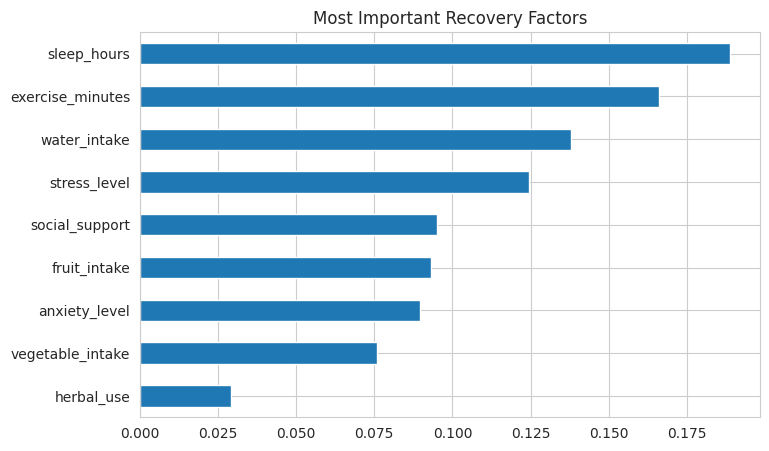

In [19]:
importance = pd.Series(model.feature_importances_, index=features)
importance.sort_values().plot(kind='barh')
plt.title("Most Important Recovery Factors")
plt.show()


Statistical Relationship

In [20]:
pearsonr(df['integrative_score'], df['health_score'])

PearsonRResult(statistic=np.float64(0.8333525413182142), pvalue=np.float64(3.300211317382186e-259))

## Key Findings

✔ Stress and anxiety significantly impact recovery  
✔ Exercise and sleep strongly improve health outcomes  
✔ Nutrition plays a major healing role  
✔ Herbal support shows positive association with recovery  
✔ Social support improves healing probability  
✔ Integrative treatment provides better outcomes than single approaches  

## Conclusion

A holistic treatment approach combining lifestyle improvements, mental wellness, nutrition, and integrative therapies leads to better health outcomes.
